In [1]:
import random
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

<b>Read data from csv</b>

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<b>Replace NaNs in Year column</b>

In [3]:
print(f'Number of rows:\t {df.shape[0]}',
      f'\nNaNs count:\t {df.Year.isna().sum()}',
      f'\nYear mean:\t {df.Year.mean()}',
      f'\nYear median:\t {df.Year.median()}',
      f'\nYear mode:\t {df.Year.mode()[0]}')

# replace NaNs in Year column with mode value
df.loc[df.Year.isna(), 'Year'] = df.Year.mode()[0]

print(f'\nStats after NaNs replacement in Year column',
      f'\nNaNs count:\t {df.Year.isna().sum()}',
      f'\nYear mean:\t {df.Year.mean()}',
      f'\nYear median:\t {df.Year.median()}',
      f'\nYear mode:\t {df.Year.mode()[0]}')

# cast Year column to int32 type
df['Year'] = df.Year.astype('int32')

print(f'\nDataframe after casting Year column to int32')

df.head()

Number of rows:	 16598 
NaNs count:	 271 
Year mean:	 2006.4064433147546 
Year median:	 2007.0 
Year mode:	 2009.0

Stats after NaNs replacement in Year column 
NaNs count:	 0 
Year mean:	 2006.448789010724 
Year median:	 2007.0 
Year mode:	 2009.0

Dataframe after casting Year column to int32


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<b>Replace NaNs in Publisher column</b>

In [4]:
print(f'NaNs before replacement',
      f'\nNaNs count:\t {df.Publisher.isna().sum()}')

# replace NaNs in Publisher column with 'Other' value
df.loc[df.Publisher.isna(), 'Publisher'] = 'Other'

print(f'\nNaNs after replacement',
      f'\nNaNs count:\t {df.Publisher.isna().sum()}')

NaNs before replacement 
NaNs count:	 58

NaNs after replacement 
NaNs count:	 0


<b>Describe each column in the dataset</b>

In [5]:
def describe_rank_column(column, description):
    print(f'=== {column.name} column description ===',
          f'\n\n{description}',
          f'\n\nData type: \t{column.dtype}',
          f'\nNA values: \t{column.isna().sum()}',
          f'\nValues count: \t{column.count()}',
          f'\nMin: \t\t{column.min()}',
          f'\nMax: \t\t{column.max()}',
          f'\nINFO: The 2 missing ranks are caused by the author of the dataset, who dropped them due to incomplete information\n')

def describe_name_column(column, description):
    field_length = column.astype(str).map(len)
    print(f'=== {column.name} column description ===',
          f'\n\n{description}',
          f'\n\nData type: \t{column.dtype}',
          f'\nNA values: \t{column.isna().sum()}',
          f'\nValues count: \t{column.count()}',
          f'\nLongest name: \t{column[field_length.idxmax()]} ({field_length.max()})',
          f'\nLongest name game: https://www.play-asia.com/ds-yamamura-misa-suspense-maiko-kogiku-kisha-katherine-sougi/13/702on0',
          f'\nShortest name: \t{column[field_length.idxmin()]} ({field_length.min()})',
          f'\nShortest name game: https://en.wikipedia.org/wiki/D_(video_game)\n')
    
def describe_quantitative_column(column, description):
    print(f'=== {column.name} column description ===',
          f'\n\n{description}',
          f'\n\nData type: \t{column.dtype}',
          f'\nNA values:   {column.isna().sum()}',
          f'\nVar: \t     {np.nanvar(column)}',
          f'\n{column.describe()}\n')

def describe_qualitative_column(column, description):
    print(f'=== {column.name} column description ===',
          f'\n\n{description}',
          f'\n\nData type: \t{column.dtype}',
          f'\nNA values:  {column.isna().sum()}',
          f'\nValue  count\n{column.value_counts()}\n')
    
describe_rank_column(df.Rank, 'Game position in ranking based on global sales')

describe_name_column(df.Name, 'The name of the game')

describe_qualitative_column(df.Platform, 'Platform of the games release (Sega Saturn(SAT), Atari2600(2600),'
                            + ' Dreamcast(DC), Sega Genesis(GEN), Neo Geo(NG), \nSupplemental Computing Device(SCD),'
                            + ' WonderSwan(WS), Panasonic 3DO(3DO), TurboGrafx-16(TG16), NEC PC-FX(PCFX),'
                            + ' \nSega Game Gear(GG) etc.)')
describe_qualitative_column(df.Genre, 'Genre of the game')
describe_qualitative_column(df.Publisher, 'Publisher of the game')

describe_quantitative_column(df.Year, 'Year of the game\'s release')

describe_quantitative_column(df.NA_Sales, 'Sales in North America (in millions)')
describe_quantitative_column(df.EU_Sales, 'Sales in Europe (in millions)')
describe_quantitative_column(df.JP_Sales, 'Sales in Japan (in millions)')
describe_quantitative_column(df.Other_Sales, 'Sales in the rest of the world (in millions)')
describe_quantitative_column(df.Global_Sales, 'Total worldwide sales (in millions)')

=== Rank column description === 

Game position in ranking based on global sales 

Data type: 	int64 
NA values: 	0 
Values count: 	16598 
Min: 		1 
Max: 		16600 
INFO: The 2 missing ranks are caused by the author of the dataset, who dropped them due to incomplete information

=== Name column description === 

The name of the game 

Data type: 	object 
NA values: 	0 
Values count: 	16598 
Longest name: 	DS Yamamura Misa Suspense: Maiko Kogiku - Kisha Katherine - Sougiya Isa Akashi - Koto ni Maru Hana Sanrin: Kyoto Satujin Jinken File (132) 
Longest name game: https://www.play-asia.com/ds-yamamura-misa-suspense-maiko-kogiku-kisha-katherine-sougi/13/702on0 
Shortest name: 	D (1) 
Shortest name game: https://en.wikipedia.org/wiki/D_(video_game)

=== Platform column description === 

Platform of the games release (Sega Saturn(SAT), Atari2600(2600), Dreamcast(DC), Sega Genesis(GEN), Neo Geo(NG), 
Supplemental Computing Device(SCD), WonderSwan(WS), Panasonic 3DO(3DO), TurboGrafx-16(TG16), NE

<b>Analyze the data</b>
* do some data mining,
* discover the structure of the data,
* search for sources of interesting conclusions

In [6]:
# add new columns showing percentage of game copies sold 
# in NA, EU, JP and rest of the world respectively
df['NA_Sales_Percentage'] = 100 * (df['NA_Sales'] / df['Global_Sales']).round(3)
df['EU_Sales_Percentage'] = 100 * (df['EU_Sales'] / df['Global_Sales']).round(3)
df['JP_Sales_Percentage'] = 100 * (df['JP_Sales'] / df['Global_Sales']).round(3)
df['Other_Sales_Percentage'] = 100 * (df['Other_Sales'] / df['Global_Sales']).round(3)

# show games, which less than 10,000 copies have been sold
df[(df['NA_Sales_Percentage'] == 0)
   & (df['EU_Sales_Percentage'] == 0)
   & (df['JP_Sales_Percentage'] == 0)
   & (df['Other_Sales_Percentage'] == 0)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Percentage,EU_Sales_Percentage,JP_Sales_Percentage,Other_Sales_Percentage
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0


In [7]:
# create histogram of games' global sales
# create box plots for global sales in each genre

# data about global sales of games in each genre
action_sales = df[df['Genre'] == 'Action']['Global_Sales']
sports_sales = df[df['Genre'] == 'Sports']['Global_Sales']
misc_sales = df[df['Genre'] == 'Misc']['Global_Sales']
role_playing_sales = df[df['Genre'] == 'Role-Playing']['Global_Sales']
shooter_sales = df[df['Genre'] == 'Shooter']['Global_Sales']
adventure_sales = df[df['Genre'] == 'Adventure']['Global_Sales']
racing_sales = df[df['Genre'] == 'Racing']['Global_Sales']
platform_sales = df[df['Genre'] == 'Platform']['Global_Sales']
simulation_sales = df[df['Genre'] == 'Simulation']['Global_Sales']
fighting_sales = df[df['Genre'] == 'Fighting']['Global_Sales']
strategy_sales = df[df['Genre'] == 'Strategy']['Global_Sales']
puzzle_sales = df[df['Genre'] == 'Puzzle']['Global_Sales']

# data for bar plot about global game sales depending on genre
action_total_sales = action_sales.sum()
sports_total_sales = sports_sales.sum()
misc_total_sales = misc_sales.sum()
role_playing_total_sales = role_playing_sales.sum()
shooter_total_sales = shooter_sales.sum()
adventure_total_sales = adventure_sales.sum()
racing_total_sales = racing_sales.sum()
platform_total_sales = platform_sales.sum()
simulation_total_sales = simulation_sales.sum()
fighting_total_sales = fighting_sales.sum()
strategy_total_sales = strategy_sales.sum()
puzzle_total_sales = puzzle_sales.sum()

# create new dataframe for aggregated data
sales_df = pd.DataFrame(index=['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter',
                               'Adventure', 'Racing', 'Platform', 'Simulation',
                               'Fighting', 'Strategy', 'Puzzle'])

# add data to dataframe
sales_df['Total_Sales'] = [action_total_sales, sports_total_sales, misc_total_sales, role_playing_total_sales,
                           shooter_total_sales, adventure_total_sales, racing_total_sales, platform_total_sales,
                           simulation_total_sales, fighting_total_sales, strategy_total_sales, puzzle_total_sales]

# data for bar plot about number of titles in each genre
action_titles = action_sales.count()
sports_titles = sports_sales.count()
misc_titles = misc_sales.count()
role_playing_titles = role_playing_sales.count()
shooter_titles = shooter_sales.count()
adventure_titles = adventure_sales.count()
racing_titles = racing_sales.count()
platform_titles = platform_sales.count()
simulation_titles = simulation_sales.count()
fighting_titles = fighting_sales.count()
strategy_titles = strategy_sales.count()
puzzle_titles = puzzle_sales.count()

# add data to dataframe
sales_df['Num_of_Titles'] = [action_titles, sports_titles, misc_titles, role_playing_titles,
                             shooter_titles, adventure_titles, racing_titles, platform_titles,
                             simulation_titles, fighting_titles, strategy_titles, puzzle_titles]

# add to dataframe data for a bar plot about the global game sales 
# divided by a number of released titles in each genre
sales_df['Sales_Mean'] = sales_df['Total_Sales'] / sales_df['Num_of_Titles']


# data for a bar plot about the median of the global game sales in each genre
action_sales_median = action_sales.median()
sports_sales_median = sports_sales.median()
misc_sales_median = misc_sales.median()
role_playing_sales_median = role_playing_sales.median()
shooter_sales_median = shooter_sales.median()
adventure_sales_median = adventure_sales.median()
racing_sales_median = racing_sales.median()
platform_sales_median = platform_sales.median()
simulation_sales_median = simulation_sales.median()
fighting_sales_median = fighting_sales.median()
strategy_sales_median = strategy_sales.median()
puzzle_sales_median = puzzle_sales.median()

# add data to dataframe
sales_df['Sales_Median'] = [action_sales_median, sports_sales_median, misc_sales_median,
                            role_playing_sales_median, shooter_sales_median, adventure_sales_median,
                            racing_sales_median, platform_sales_median, simulation_sales_median,
                            fighting_sales_median, strategy_sales_median, puzzle_sales_median]

sales_df['NA_Sales_Mean'] = np.nan
sales_df['EU_Sales_Mean'] = np.nan
sales_df['JP_Sales_Mean'] = np.nan
sales_df['Other_Sales_Mean'] = np.nan

sales_df['NA_Sales_Median'] = np.nan
sales_df['EU_Sales_Median'] = np.nan
sales_df['JP_Sales_Median'] = np.nan
sales_df['Other_Sales_Median'] = np.nan

sales_df['NA_Sales_Global_Percent'] = np.nan
sales_df['EU_Sales_Global_Percent'] = np.nan
sales_df['JP_Sales_Global_Percent'] = np.nan
sales_df['Other_Sales_Global_Percent'] = np.nan

for genre in list(sales_df.index.values):
    sales_df.loc[[genre], ['NA_Sales_Mean']] = df[df['Genre'] == genre]['NA_Sales'].mean()
    sales_df.loc[[genre], ['EU_Sales_Mean']] = df[df['Genre'] == genre]['EU_Sales'].mean()
    sales_df.loc[[genre], ['JP_Sales_Mean']] = df[df['Genre'] == genre]['JP_Sales'].mean()
    sales_df.loc[[genre], ['Other_Sales_Mean']] = df[df['Genre'] == genre]['Other_Sales'].mean()

    sales_df.loc[[genre], ['NA_Sales_Median']] = df[df['Genre'] == genre]['NA_Sales'].median()
    sales_df.loc[[genre], ['EU_Sales_Median']] = df[df['Genre'] == genre]['EU_Sales'].median()
    sales_df.loc[[genre], ['JP_Sales_Median']] = df[df['Genre'] == genre]['JP_Sales'].median()
    sales_df.loc[[genre], ['Other_Sales_Median']] = df[df['Genre'] == genre]['Other_Sales'].median()
    
    sales_df.loc[[genre], ['NA_Sales_Global_Percent']] = df[df['Genre'] == genre]['NA_Sales'].sum() / sales_df.loc[genre, 'Total_Sales']
    sales_df.loc[[genre], ['EU_Sales_Global_Percent']] = df[df['Genre'] == genre]['EU_Sales'].sum() / sales_df.loc[genre, 'Total_Sales']
    sales_df.loc[[genre], ['JP_Sales_Global_Percent']] = df[df['Genre'] == genre]['JP_Sales'].sum() / sales_df.loc[genre, 'Total_Sales']
    sales_df.loc[[genre], ['Other_Sales_Global_Percent']] = df[df['Genre'] == genre]['Other_Sales'].sum() / sales_df.loc[genre, 'Total_Sales']

# change the order of columns to make it more readable
sales_df = sales_df[['Total_Sales', 'Num_of_Titles', 'Sales_Mean', 'NA_Sales_Mean',
                     'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean', 'Sales_Median',
                     'NA_Sales_Median', 'EU_Sales_Median', 'JP_Sales_Median', 'Other_Sales_Median',
                     'NA_Sales_Global_Percent', 'EU_Sales_Global_Percent', 'JP_Sales_Global_Percent',
                     'Other_Sales_Global_Percent']]
sales_df

,Total_Sales,Num_of_Titles,Sales_Mean,NA_Sales_Mean,EU_Sales_Mean,JP_Sales_Mean,Other_Sales_Mean,Sales_Median,NA_Sales_Median,EU_Sales_Median,JP_Sales_Median,Other_Sales_Median,NA_Sales_Global_Percent,EU_Sales_Global_Percent,JP_Sales_Global_Percent,Other_Sales_Global_Percent
Action,1751.18,3316,0.528100,0.264726,0.158323,0.048236,0.056508,0.190,0.10,0.03,0.00,0.01,0.501279,0.299798,0.091338,0.107002
Sports,1330.93,2346,0.567319,0.291283,0.160635,0.057702,0.057532,0.220,0.11,0.02,0.00,0.01,0.513438,0.283148,0.101711,0.101410
Misc,809.96,1739,0.465762,0.235906,0.124198,0.061967,0.043312,0.160,0.08,0.01,0.00,0.01,0.506494,0.266655,0.133044,0.092992
Role-Playing,927.37,1488,0.623233,0.219946,0.126384,0.236767,0.040060,0.185,0.04,0.01,0.05,0.01,0.352912,0.202789,0.379902,0.064279
Shooter,1037.37,1310,0.791885,0.444733,0.239137,0.029221,0.078389,0.230,0.12,0.05,0.00,0.02,0.561613,0.301985,0.036901,0.098991
Adventure,239.04,1286,0.185879,0.082271,0.049868,0.040490,0.013072,0.060,0.00,0.00,0.01,0.00,0.442604,0.268281,0.217830,0.070323
Racing,732.04,1249,0.586101,0.287766,0.190865,0.045388,0.061865,0.190,0.10,0.04,0.00,0.01,0.490984,0.325652,0.077441,0.105554
Platform,831.37,886,0.938341,0.504571,0.227573,0.147596,0.058228,0.280,0.14,0.05,0.00,0.01,0.537727,0.242527,0.157295,0.062054
Simulation,392.20,867,0.452364,0.211430,0.130773,0.073472,0.036355,0.160,0.07,0.01,0.00,0.01,0.467389,0.289087,0.162417,0.080367
Fighting,448.91,848,0.529375,0.263667,0.119481,0.103007,0.043255,0.210,0.08,0.03,0.01,0.01,0.498073,0.225702,0.194582,0.081709


Text(0, 0.5, "Number of games' titles")

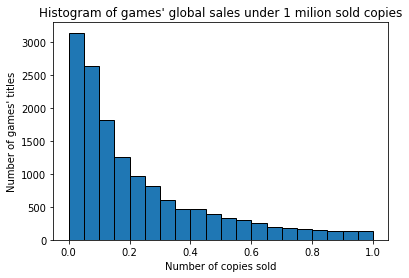

In [8]:
# histogram of games global sales (games, which copies haven't been sold more than 1 milion times)
plt.hist(df[df['Global_Sales'] <= 1]['Global_Sales'],
         bins=[0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35,
               0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75,
               0.80, 0.85, 0.90, 0.95, 1.00],
         ec='black')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.title('Histogram of games\' global sales under 1 milion sold copies')
plt.xlabel('Number of copies sold')
plt.ylabel('Number of games\' titles')

Text(0, 0.5, "Number of games' titles")

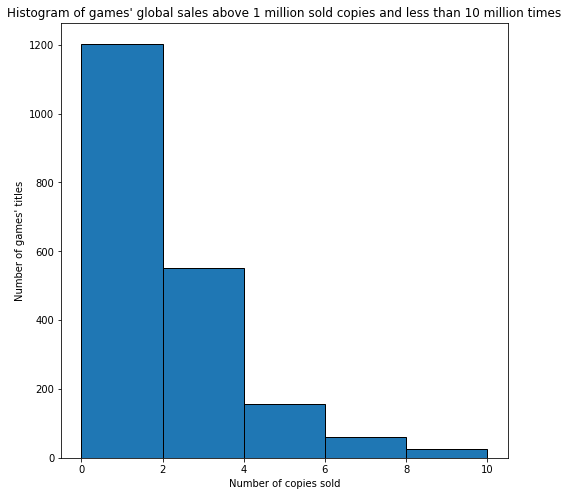

In [9]:
# histogram of games global sales (games, which copies have been sold more than 1 milion times and more than 10 times)
plt.hist(df[(df['Global_Sales'] > 1) & (df['Global_Sales'] <= 10)]['Global_Sales'],
         bins=[0, 2, 4, 6, 8, 10],
         ec='black')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.title('Histogram of games\' global sales above 1 million sold copies and less than 10 million times')
plt.xlabel('Number of copies sold')
plt.ylabel('Number of games\' titles')

Text(0, 0.5, "Number of games' titles")

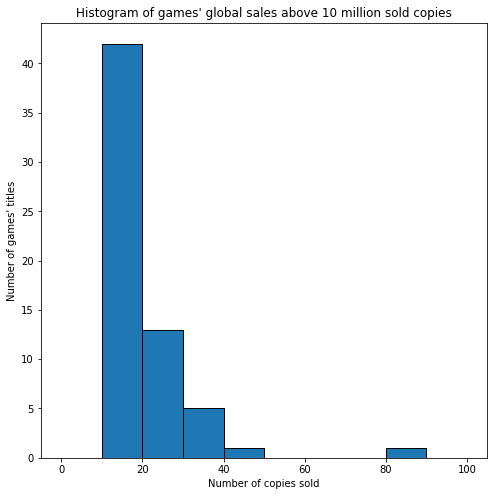

In [10]:
# histogram of games global sales (games, which copies have been sold more than 1 milion times and more than 10 times)
plt.hist(df[df['Global_Sales'] > 10]['Global_Sales'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ec='black')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.title('Histogram of games\' global sales above 10 million sold copies')
plt.xlabel('Number of copies sold')
plt.ylabel('Number of games\' titles')

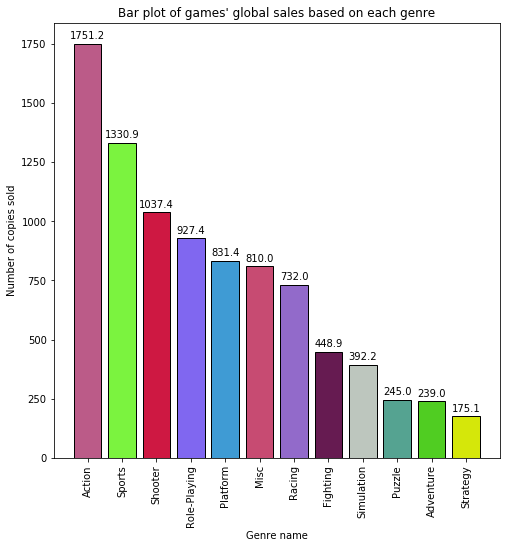

In [11]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Bar plot dataframe containing data about games' global sales based on each game genre
bar_plot_df = sales_df['Total_Sales'].sort_values(axis=0, ascending=False)

fig, ax = plt.subplots()

red_values = random.sample(range(1, 255), len(bar_plot_df.index.values))
blue_values = random.sample(range(1, 255), len(bar_plot_df.index.values))
green_values = random.sample(range(1, 255), len(bar_plot_df.index.values))

rects1 = ax.bar(x=range(len(bar_plot_df.index.values)),
                height=bar_plot_df,
                ec='black',
                color=[(red_values[i]/255,
                        blue_values[i]/255,
                        green_values[i]/255, 1)
                       for i in range(len(bar_plot_df.index.values))])

ax.set_xticks(np.arange(len(bar_plot_df.index.values)))
ax.set_xticklabels(bar_plot_df.index.values, rotation=90)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
ax.set_title('Bar plot of games\' global sales based on each genre')
ax.set_xlabel('Genre name')
ax.set_ylabel('Number of copies sold')

autolabel(rects1)

Text(0, 0.5, 'Number of copies sold globally')

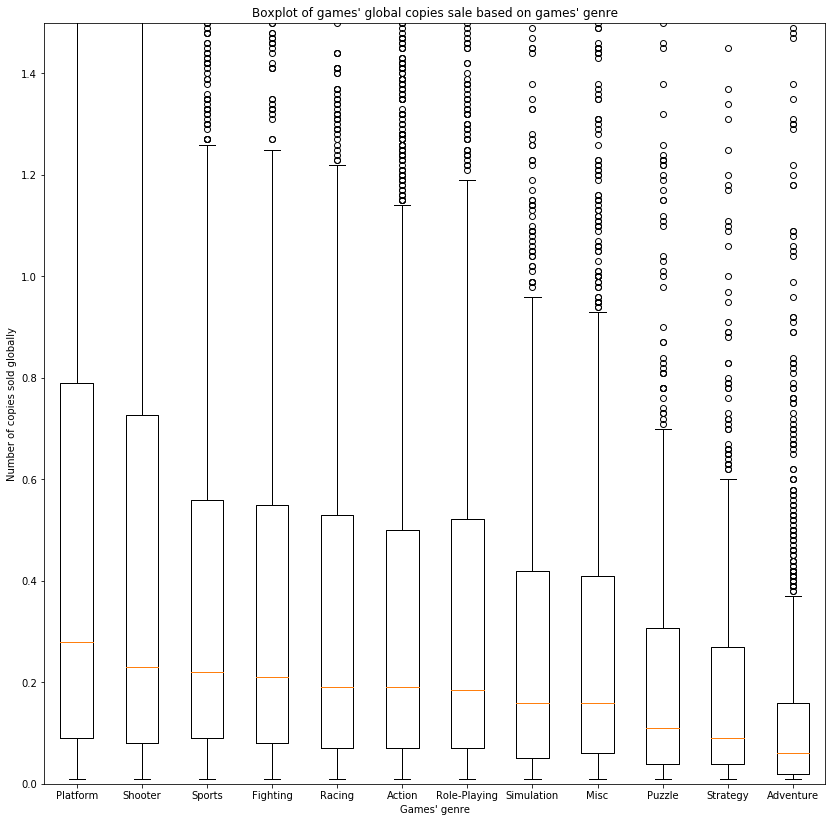

In [34]:
# boxplot for games global copies sale based on games' genre
plt.figure(figsize=(14, 14))
plt.boxplot((platform_sales,
             shooter_sales,
             sports_sales,
             fighting_sales,
             racing_sales,
             action_sales,
             role_playing_sales,
             simulation_sales,
             misc_sales,
             puzzle_sales,
             strategy_sales,
             adventure_sales),
            labels=sales_df['Sales_Median'].sort_values(axis=0, ascending=False).index.values)

plt.ylim(0, 1.5)
plt.title('Boxplot of games\' global copies sale based on games\' genre')
plt.xlabel('Games\' genre')
plt.ylabel('Number of copies sold globally')

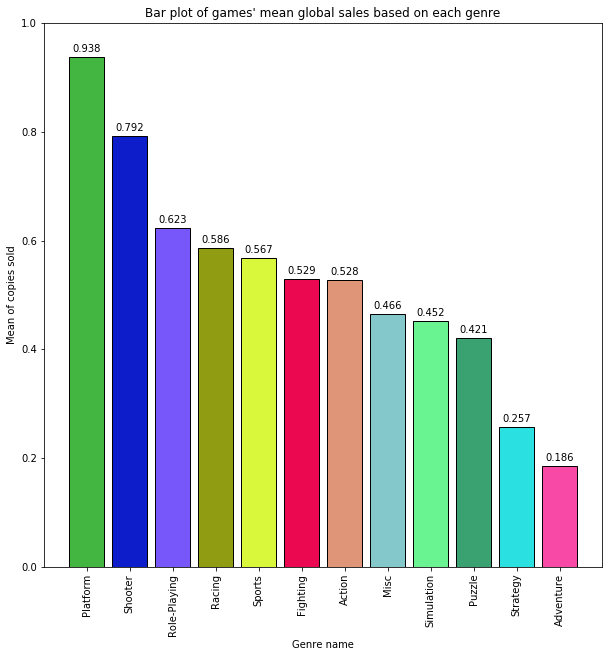

In [13]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Bar plot dataframe containing data about games' global sales based on each game genre
bar_plot_df = sales_df['Sales_Mean'].sort_values(axis=0, ascending=False)

fig, ax = plt.subplots()

red_values = random.sample(range(1, 255), len(bar_plot_df.index.values))
blue_values = random.sample(range(1, 255), len(bar_plot_df.index.values))
green_values = random.sample(range(1, 255), len(bar_plot_df.index.values))

rects1 = ax.bar(x=range(len(bar_plot_df.index.values)),
                height=bar_plot_df,
                ec='black',
                color=[(red_values[i]/255,
                        blue_values[i]/255,
                        green_values[i]/255, 1)
                       for i in range(len(bar_plot_df.index.values))])

ax.set_xticks(np.arange(len(bar_plot_df.index.values)))
ax.set_xticklabels(bar_plot_df.index.values, rotation=90)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
ax.set_title('Bar plot of games\' mean global sales based on each genre')
ax.set_xlabel('Genre name')
ax.set_ylabel('Mean of copies sold')
ax.set_ylim([0, 1])

autolabel(rects1)

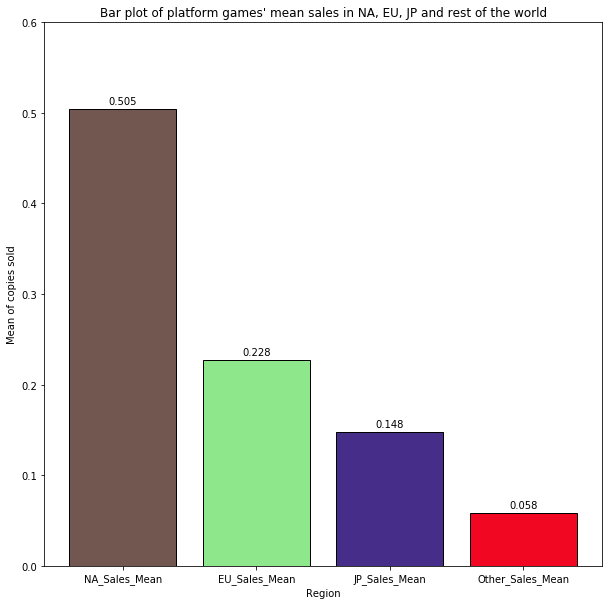

In [14]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Bar plot dataframe containing data about games' global sales based on each game genre
bar_plot_df = sales_df.loc['Platform', ['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']].sort_values(axis=0, ascending=False)

fig, ax = plt.subplots()

red_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
blue_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
green_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))

rects1 = ax.bar(x=range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])),
                height=bar_plot_df,
                ec='black',
                color=[(red_values[i]/255,
                        blue_values[i]/255,
                        green_values[i]/255, 1)
                       for i in range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))])

ax.set_xticks(np.arange(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])))
ax.set_xticklabels(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
ax.set_title('Bar plot of platform games\' mean sales in NA, EU, JP and rest of the world')
ax.set_xlabel('Region')
ax.set_ylabel('Mean of copies sold')
ax.set_ylim([0, 0.6])

autolabel(rects1)

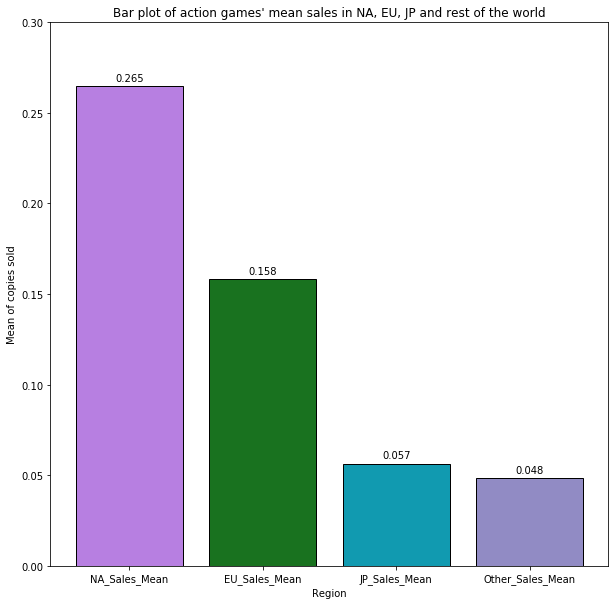

In [15]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Bar plot dataframe containing data about games' global sales based on each game genre
bar_plot_df = sales_df.loc['Action', ['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']].sort_values(axis=0, ascending=False)

fig, ax = plt.subplots()

red_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
blue_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
green_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))

rects1 = ax.bar(x=range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])),
                height=bar_plot_df,
                ec='black',
                color=[(red_values[i]/255,
                        blue_values[i]/255,
                        green_values[i]/255, 1)
                       for i in range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))])

ax.set_xticks(np.arange(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])))
ax.set_xticklabels(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
ax.set_title('Bar plot of action games\' mean sales in NA, EU, JP and rest of the world')
ax.set_xlabel('Region')
ax.set_ylabel('Mean of copies sold')
ax.set_ylim([0, 0.3])

autolabel(rects1)

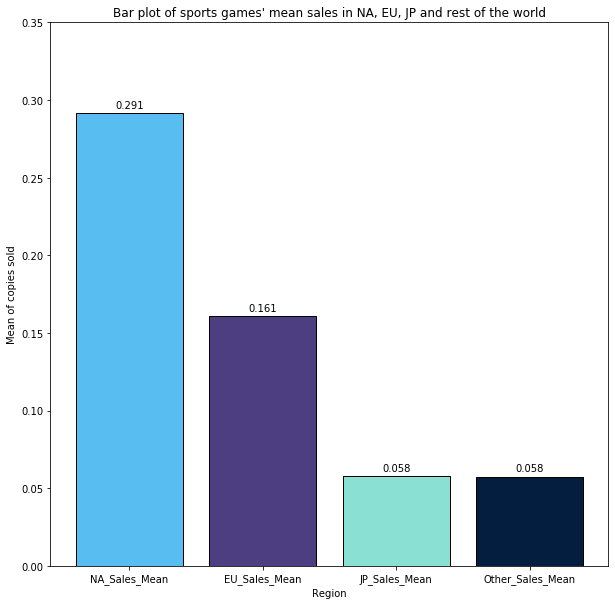

In [16]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Bar plot dataframe containing data about games' global sales based on each game genre
bar_plot_df = sales_df.loc['Sports', ['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']].sort_values(axis=0, ascending=False)

fig, ax = plt.subplots()

red_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
blue_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
green_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))

rects1 = ax.bar(x=range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])),
                height=bar_plot_df,
                ec='black',
                color=[(red_values[i]/255,
                        blue_values[i]/255,
                        green_values[i]/255, 1)
                       for i in range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))])

ax.set_xticks(np.arange(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])))
ax.set_xticklabels(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
ax.set_title('Bar plot of sports games\' mean sales in NA, EU, JP and rest of the world')
ax.set_xlabel('Region')
ax.set_ylabel('Mean of copies sold')
ax.set_ylim([0, 0.35])

autolabel(rects1)

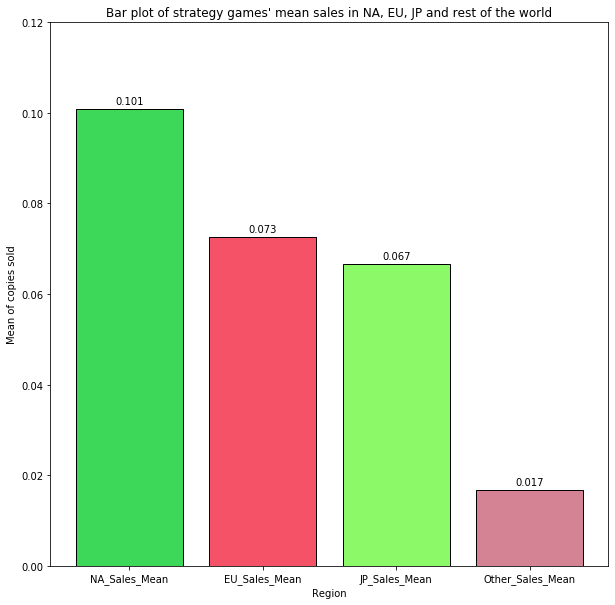

In [17]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Bar plot dataframe containing data about games' global sales based on each game genre
bar_plot_df = sales_df.loc['Strategy', ['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']].sort_values(axis=0, ascending=False)

fig, ax = plt.subplots()

red_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
blue_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))
green_values = random.sample(range(1, 255), len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))

rects1 = ax.bar(x=range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])),
                height=bar_plot_df,
                ec='black',
                color=[(red_values[i]/255,
                        blue_values[i]/255,
                        green_values[i]/255, 1)
                       for i in range(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean']))])

ax.set_xticks(np.arange(len(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])))
ax.set_xticklabels(['NA_Sales_Mean', 'EU_Sales_Mean', 'JP_Sales_Mean', 'Other_Sales_Mean'])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
ax.set_title('Bar plot of strategy games\' mean sales in NA, EU, JP and rest of the world')
ax.set_xlabel('Region')
ax.set_ylabel('Mean of copies sold')
ax.set_ylim([0, 0.12])

autolabel(rects1)

<b>Naive Bayes Classifier and Multilayer Perceptron Classifier example</b>